In [ ]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
dataset = pd.read_csv('/content/drive/MyDrive/ML/Credit_Data.csv')
# dataset.replace("#NUM!", '0', inplace = True)
# dataset = dataset.drop('ammonia', axis = 1)
# dataset['is_safe'] = dataset['is_safe'].replace('1', 1)
# dataset['is_safe'] = dataset['is_safe'].replace('0', 0)
dataset['Gender'] = dataset['Gender'].replace({'Male': 1, 'Female': 2})
dataset['Ethnicity'] = dataset['Ethnicity'].replace({'Caucasian': 1, 'Asian': 2, 'African American': 3})
dataset = dataset.replace({'Yes': 1, 'No': 2})
df = dataset.copy().drop(['Ethnicity'], axis=1)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


<ipython-input-114-0600edbb95f0>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Gender'] = dataset['Gender'].replace({'Male': 1, 'Female': 2})
<ipython-input-114-0600edbb95f0>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Ethnicity'] = dataset['Ethnicity'].replace({'Caucasian': 1, 'Asian': 2, 'African American': 3})
<ipython-input-114-0600edbb95f0>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.in

In [ ]:
df.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
0,1,14.891,3606,283,2,34,11,1,2,1,333
1,2,106.025,6645,483,3,82,15,2,1,1,903
2,3,104.593,7075,514,4,71,11,1,2,2,580
3,4,148.924,9504,681,3,36,11,2,2,2,964
4,5,55.882,4897,357,2,68,16,1,2,1,331


In [ ]:
vals = dataset['Ethnicity'].unique()
vals


array([1, 2, 3])

In [ ]:
# сохраняем только числовые столбцы. Категориальные кодируем в числовые. Целевую переменную (если она есть) - убираем
cols_for_clusters = ['Age', 'Rating', 'Balance','Limit','Gender','Student','Married','Education']
df= dataset[cols_for_clusters].copy() # делаем копию, чтобы не было сюрпризов с исходным набором данных

In [ ]:

X = df
y = dataset['Ethnicity'].replace(vals, [0, 1, 2])

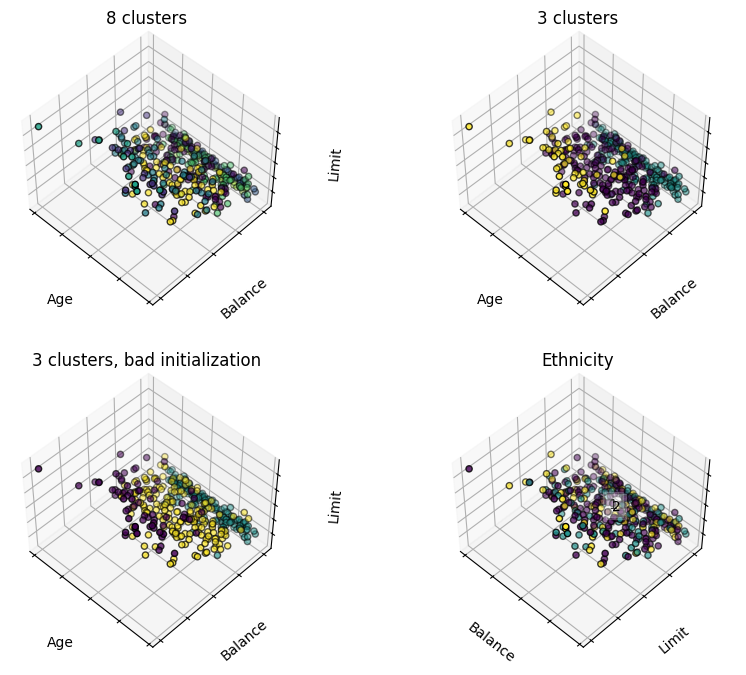

In [ ]:
# K-Means кластеризации

import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans

estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X["Age"], X["Balance"], X["Limit"], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Age")
    ax.set_ylabel("Balance")
    ax.set_zlabel("Limit")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [(vals[0], 0), (vals[1], 1)]:
    ds = dataset[dataset["Ethnicity"]==name]
    ax.text3D(
        ds["Age"].mean(),
        ds["Balance"].mean(),
        ds["Limit"].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X["Age"], X["Balance"], X["Limit"], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Balance")
ax.set_ylabel("Limit")
ax.set_zlabel("Age")
ax.set_title("Ethnicity")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

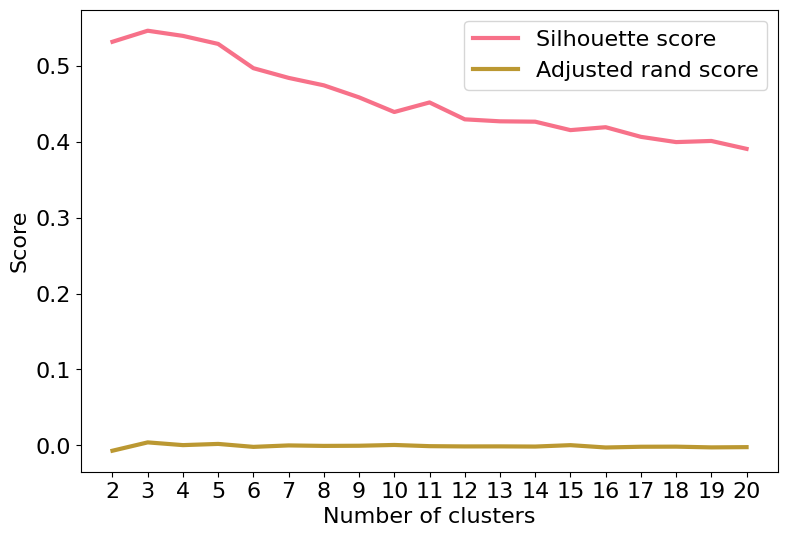

In [ ]:
#Метрики

from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score

n_clusters = np.arange(2, 21)

best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n

plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()


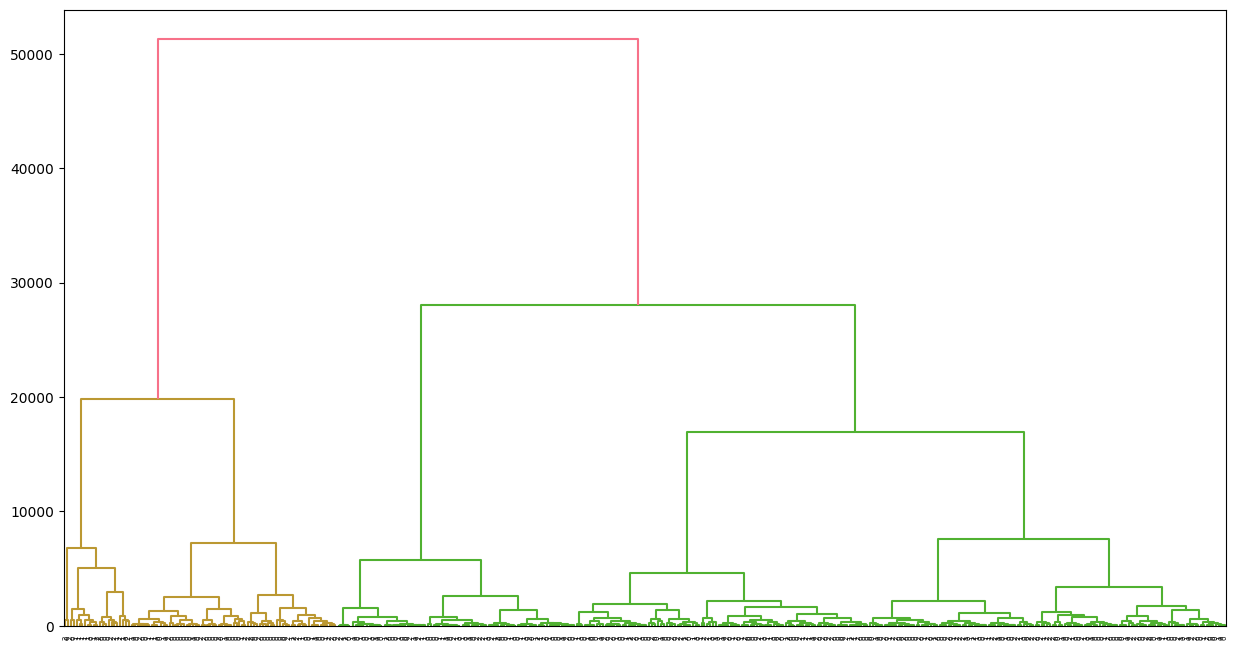

In [ ]:
# Иерархическая кластеризация

from scipy.cluster.hierarchy import linkage, dendrogram

samples = df.values

mergings = linkage(samples, method='ward')

plt.figure(figsize=(15, 8))

dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

['y', 'b', 'g', 'r']


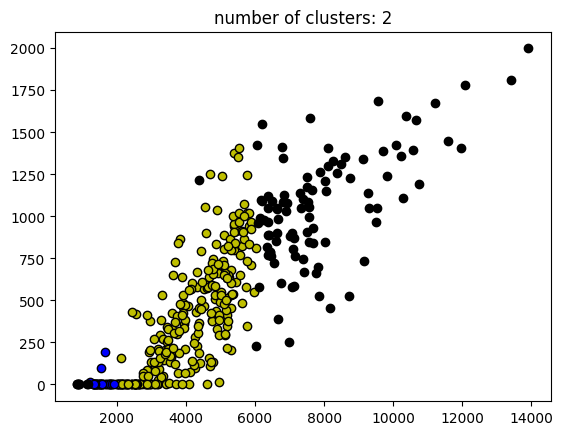

In [ ]:
# Алгоритм DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

mins = X.shape[1]

db = DBSCAN(eps=480, min_samples=45).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["Limit"], xy["Balance"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["Limit"], xy["Balance"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

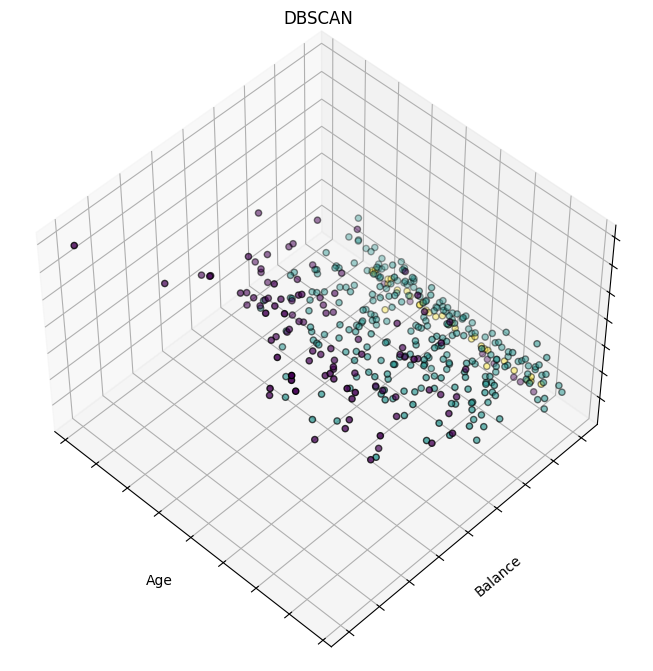

In [ ]:
# Добавление 3D визуализации для DBSCAN
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

ax.scatter(X['Age'], X["Balance"], X["Limit"],  c=labels.astype(float), edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Age")
ax.set_ylabel("Balance")
ax.set_zlabel("Limit")
ax.set_title("DBSCAN")

plt.show()

In [ ]:
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.34
Adjusted Rand Index: -0.01


In [ ]:
print(labels)

[ 0 -1 -1 -1  0 -1  0 -1  0 -1 -1  1  0 -1  0  0  0  0 -1 -1  0 -1  0  0
  1  0  0  0 -1  0  0  0 -1  1  0  0 -1 -1  0  0  0 -1  0 -1 -1 -1  0  0
  0  0  0  0  0  0  1  1  0  0  0  0  0  0  1  0  0  0 -1  0  0 -1  0 -1
  0  0  0  0  0  0 -1  0  0  0  0  1  0 -1 -1  0  0 -1  0  0  0  0  0 -1
  0  0  0 -1  0  0 -1 -1  0  0  1  0 -1  0  0  0 -1 -1  0  0  0 -1  0  1
  1 -1 -1  1  0  0  0  0 -1  0  0  1  0  0  0  0  0  0  0 -1 -1 -1 -1  0
  0  0  0  1  0 -1  0  0  0  0  0  1  0  0  0  0  0  1 -1  0  0  0  0  0
  0 -1  0  0  0  0 -1  0  0  0  0 -1  0  0 -1  0 -1  0  0  0 -1  0  0 -1
  0 -1  0  0 -1  0  0  0  0 -1  1 -1  0  0  0 -1  0 -1  0  0  0  0  0  0
  0  0  1  0  0 -1 -1  0 -1  0 -1  0  0 -1  0  0  0  0 -1  0  0  0  0  0
  0 -1  1 -1  1  0  0  0 -1  1  0  0 -1  0 -1  0  1  0  0 -1  0 -1  0  0
  0  0  0  0  1  0  0  0  0  0  0 -1  0  0 -1  0  0  1 -1 -1  0  1  1  0
  0  0  0  0  0 -1  0  1  0  0  0  0  0  0  0  0 -1  1  0  0  0 -1  0  0
  0 -1 -1  0 -1  0  1  0 -1  0  0 -1  0  0 -1 -1  0